In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import power_transform

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

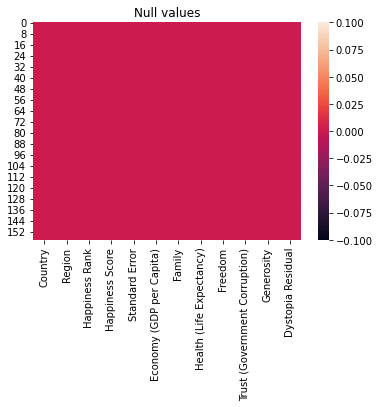

In [9]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [10]:
corr_mat = df.corr()
corr_mat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


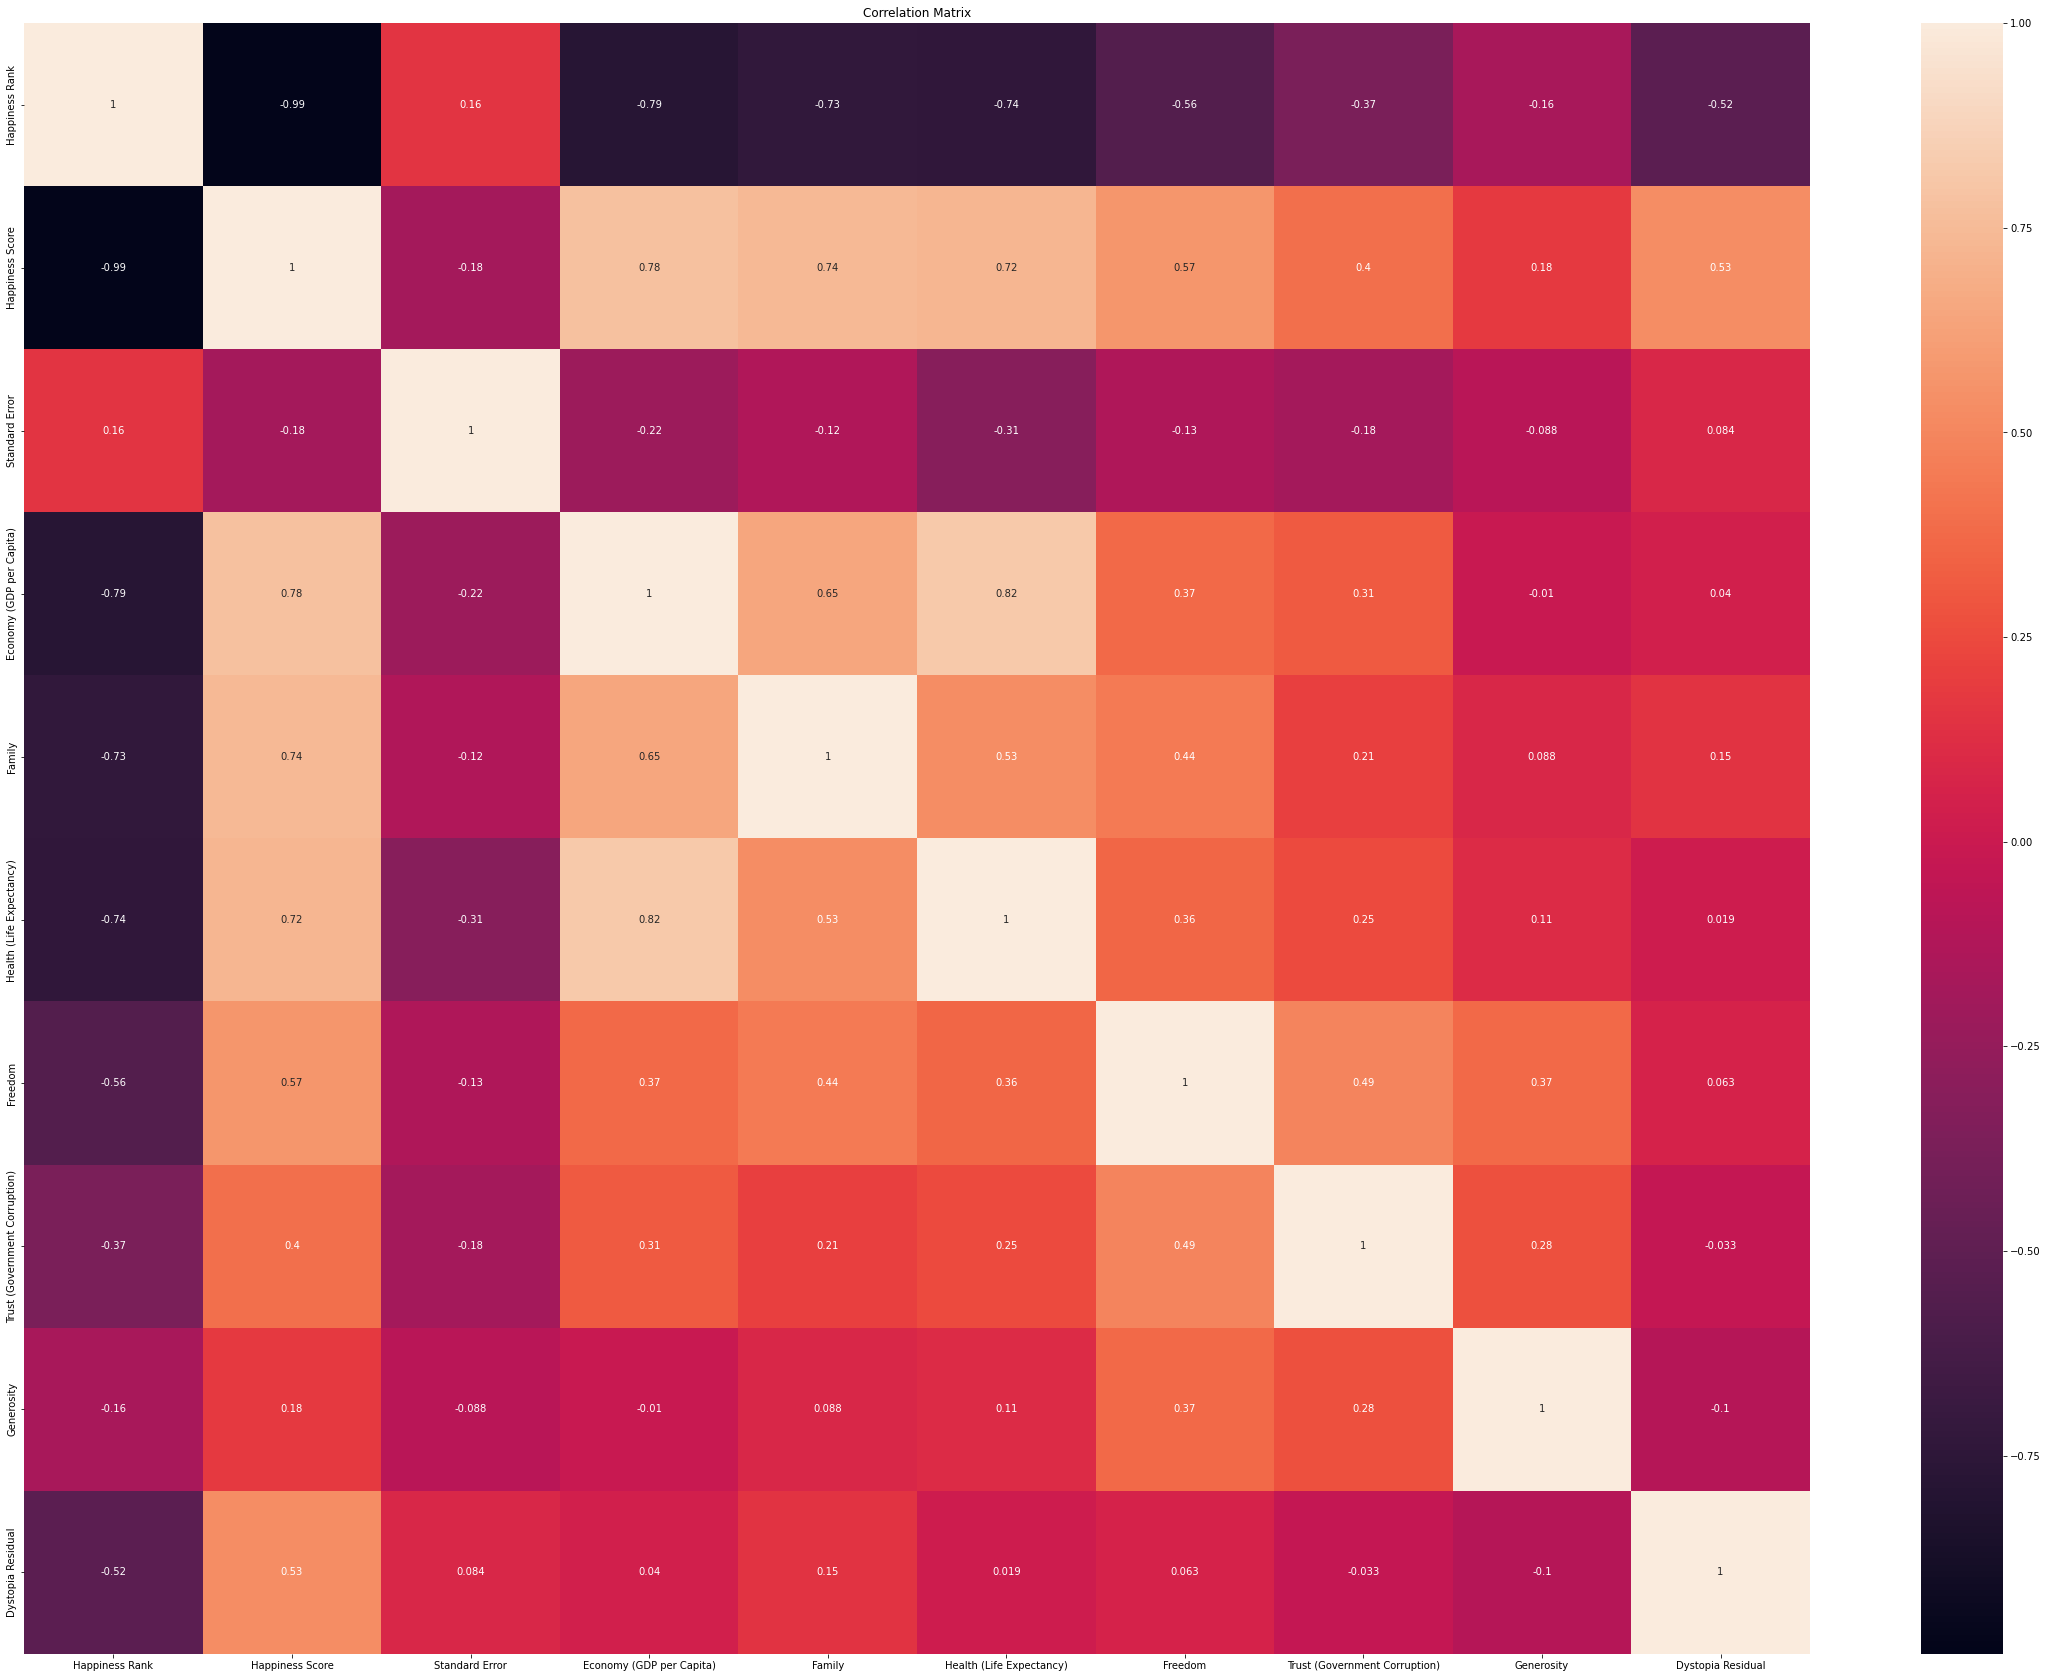

In [11]:
plt.figure(figsize = [40,30])
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

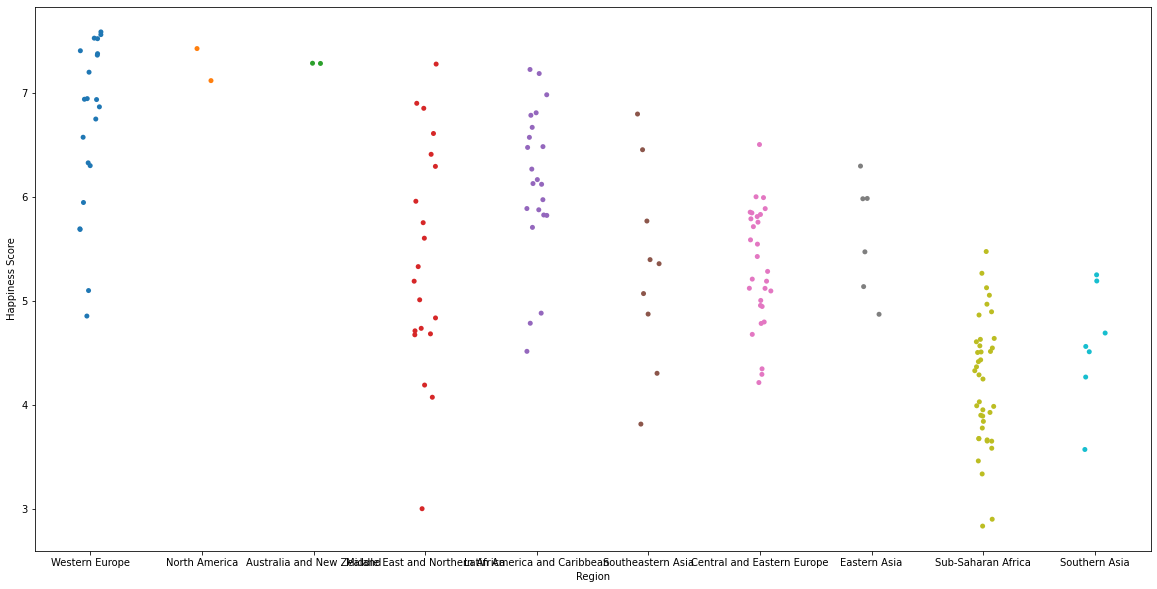

In [12]:
plt.figure(figsize = [20,10])
sns.stripplot(x = 'Region', y = 'Happiness Score', data = df)
plt.show()

In [13]:
df = df.drop(columns = ['Country', 'Region', 'Happiness Rank'])

In [14]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
z_score = abs(zscore(df))

In [16]:
df_new = df[(z_score<3).all(axis=1)]

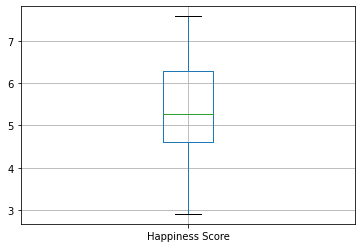

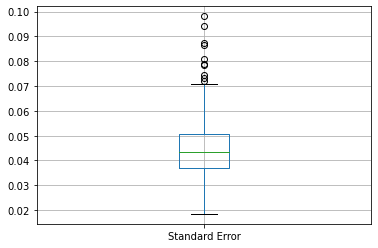

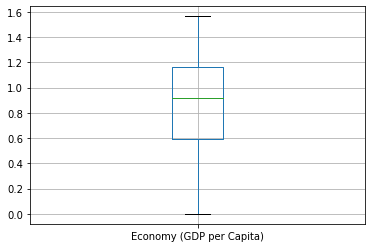

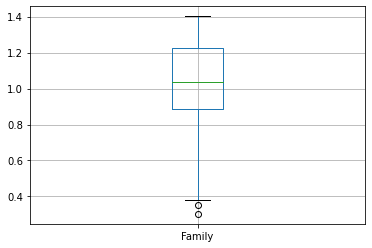

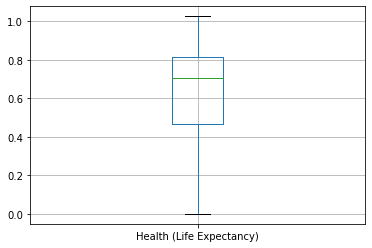

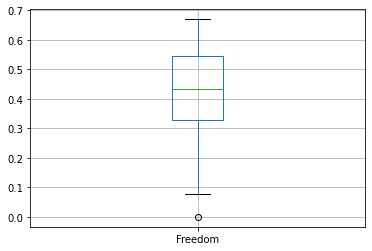

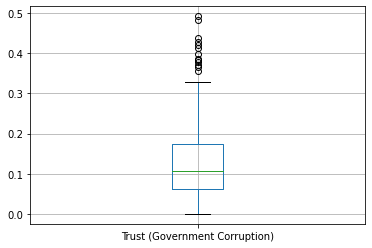

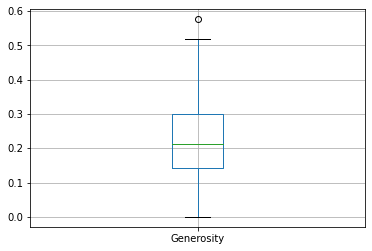

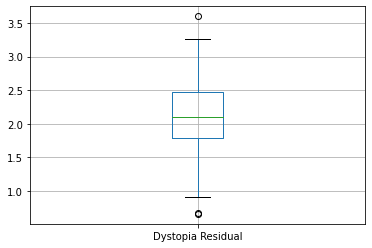

In [17]:
for i in df_new.columns:
    df_new.boxplot(i)
    plt.show()

In [18]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [19]:
print(power_transform(df))

[[ 1.85703445 -0.9722262   1.44606101 ...  1.77399061  0.62239051
   0.75099154]
 [ 1.83666844  0.30934969  1.17332111 ...  0.31599326  1.48099498
   1.11001108]
 [ 1.8100018  -1.06201662  1.23983557 ...  1.90679207  0.92797276
   0.70227525]
 ...
 [-2.20718027  0.39913742 -0.5134688  ...  0.73891461  1.65933595
  -2.86621557]
 [-2.31217748  1.92690194 -1.89495386 ... -0.15194624 -0.19482942
  -0.51480136]
 [-2.38132666  1.31032295 -1.52122584 ... -0.06732623 -0.49041465
  -0.97664547]]


In [20]:
X = df.drop(columns = ['Happiness Score'])
y = df['Happiness Score']

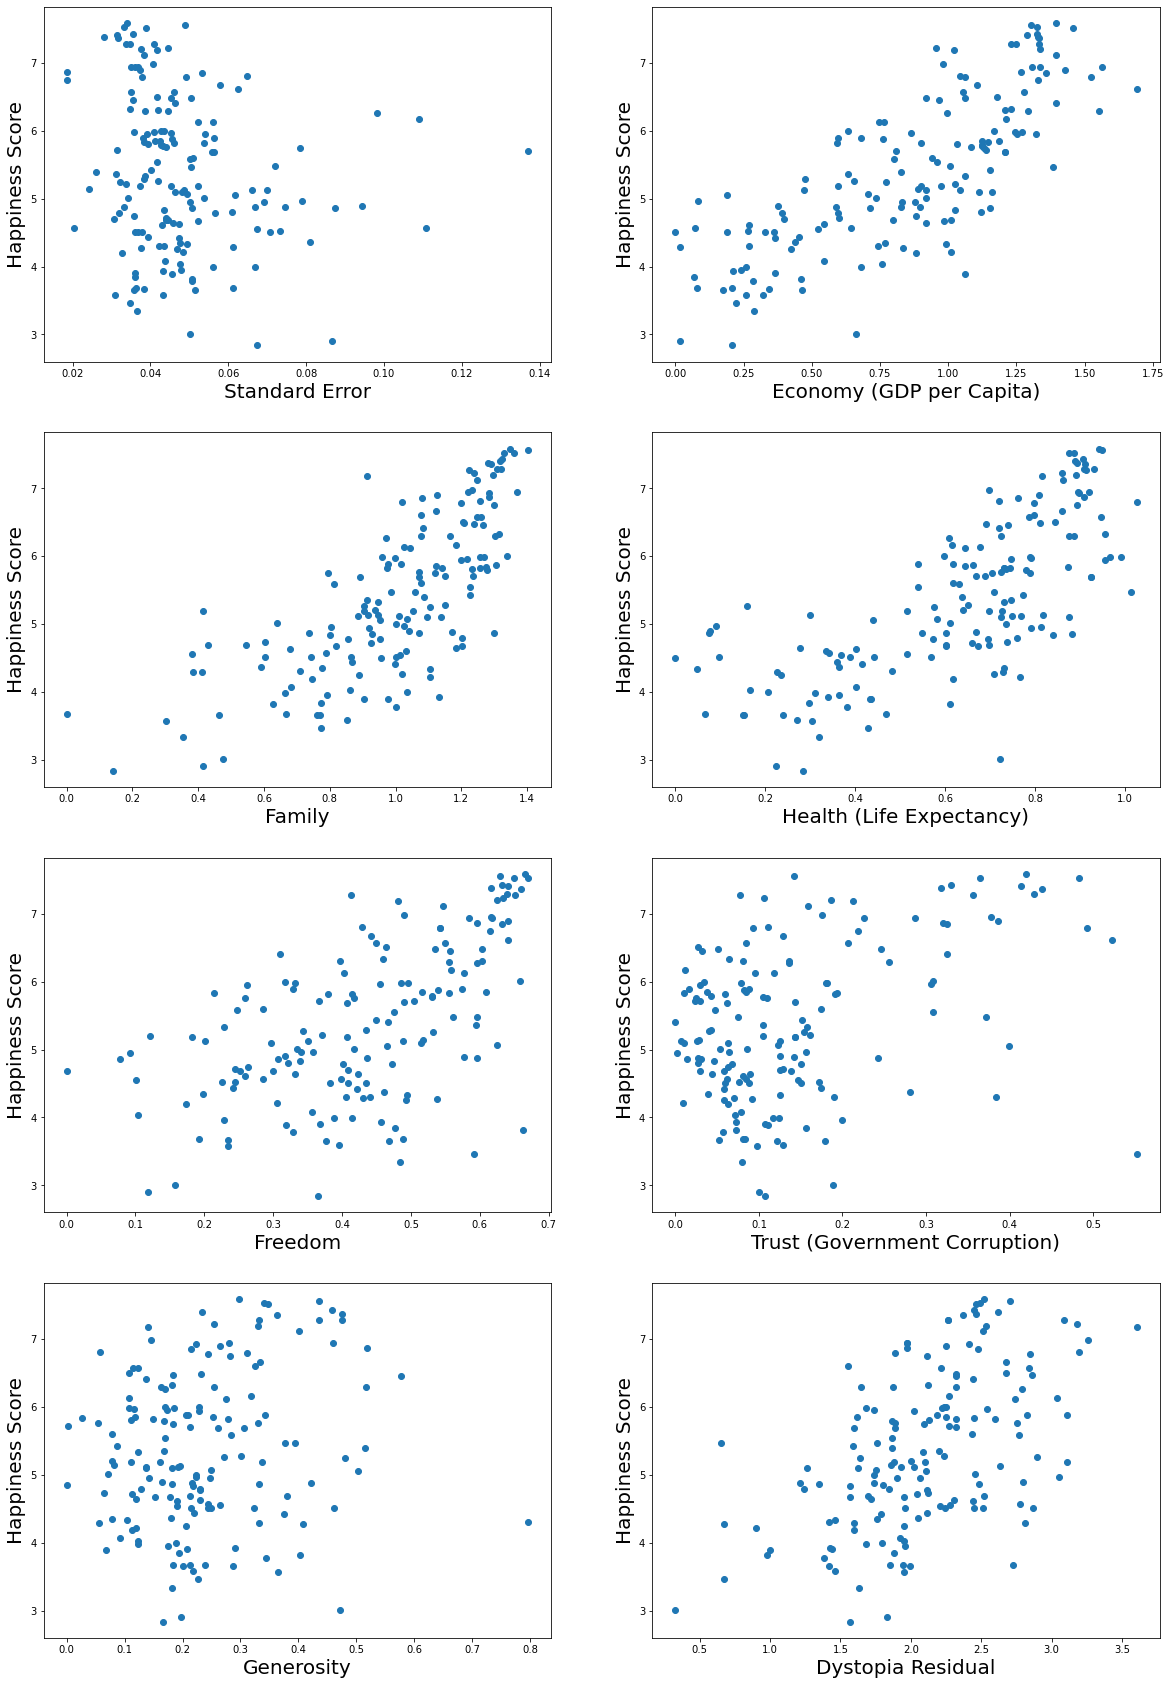

In [21]:
plt.figure(figsize = (20,30), facecolor = 'White')
plotnumber = 1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score', fontsize=20)
    plotnumber+=1
    
plt.show()

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=340)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
lr = LinearRegression()
svm = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
pred = lr.predict(X_test)

In [29]:
svm.fit(X_train, y_train)

SVR()

In [30]:
pre = svm.predict(X_test)

In [31]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
pr = dt.predict(X_test)

In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
p = rf.predict(X_test)

In [35]:
r2_score(y_test, pred)

0.9999999092232216

In [36]:
r2_score(y_test, pre)

0.9130713504733069

In [37]:
r2_score(y_test, pr)

0.7003749199829297

In [38]:
r2_score(y_test, p)

0.8753457590115467

In [39]:
cvs = cross_val_score(lr,X,y,cv = 5, scoring = 'r2')
print(cvs.mean())



0.9999981871007761


In [40]:
cv = cross_val_score(dt,X,y,cv = 5, scoring = 'r2')
print(cv.mean())

-7.308030157826134


In [41]:
c = cross_val_score(svm,X,y,cv = 5, scoring = 'r2')
print(c.mean())

0.029077690828499137


In [42]:
c_rf = cross_val_score(rf,X,y,cv = 5)
print(c_rf.mean())

-3.3010801035166493


In [43]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
predd = lasso.predict(X_test)

In [44]:
lasso.score(X_train, y_train)

0.999999926265406

In [45]:
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train, y_train)
predi = ridge.predict(X_test)

In [46]:
ridge.score(X_train, y_train)

0.9999999477613957

In [47]:
import pickle

In [48]:
happiness_report = 'pickle_file.pkl'
pickle.dump(ridge,open(happiness_report, 'wb'))